In [1]:
import pandas as pd

import warnings #These two lines will ignore the warning messages
warnings.simplefilter("ignore")  

df=pd.read_csv('Banking_data.csv')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
df['education'] = df['education'].replace({'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown':1})
df['default'] = df['default'].replace({'no': 0, 'yes': 1})
df['marital'] = df['marital'].replace({'single': 0, 'married': 1, 'divorced':0})
df['housing'] = df['housing'].replace({'no': 0, 'yes': 1})
df['y'] = df['y'].replace({'no': 0, 'yes': 1})
df['loan'] = df['loan'].replace({'no': 0, 'yes': 1})


df = df.drop(["job", "contact", "poutcome", "month"], axis = 1)


In [11]:
df

,age,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,1,2,0,2143,1,0,5,261,1,-1,0,0
1,44,0,1,0,29,1,0,5,151,1,-1,0,0
2,33,1,1,0,2,1,1,5,76,1,-1,0,0
3,47,1,1,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,1,0,0,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,2,0,825,0,0,17,977,3,-1,0,1
45207,71,0,0,0,1729,0,0,17,456,2,-1,0,1
45208,72,1,1,0,5715,0,0,17,1127,5,184,3,1
45209,57,1,1,0,668,0,0,17,508,4,-1,0,0


In [4]:
df['education'].mode()[0] #filled unknowns with 1(mode), which is secondary.

1

<AxesSubplot:>

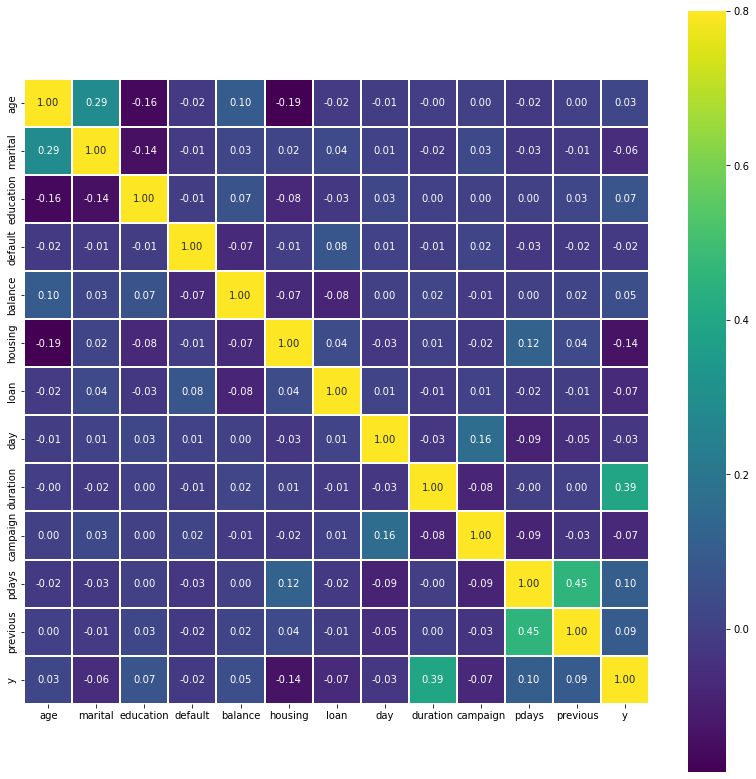

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

colormap = plt.cm.viridis
cor = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)


In [6]:
import sys
sys.path.append('C:\\Users\\Yi\\MGV469 Python') 

import warnings 
warnings.simplefilter("ignore")  

from my_functionshw11 import stratified_sample
#my_functionshw11.py

X_train, X_test, y_train, y_test = stratified_sample(df,'y',0.8)
y_test.value_counts()/len(y_test)

#print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

0    0.88299
1    0.11701
Name: y, dtype: float64

In [8]:
import sys
sys.path.append('C:\\Users\\Yi\\MGV469 Python') 

import warnings 
warnings.simplefilter("ignore")  

from my_functionshw11 import stratified_sample
#my_functionshw11.py

X_train, X_test, y_train, y_test = stratified_sample(df,'y',0.8)
y_test.value_counts()/len(y_test)

#print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

0    0.88299
1    0.11701
Name: y, dtype: float64

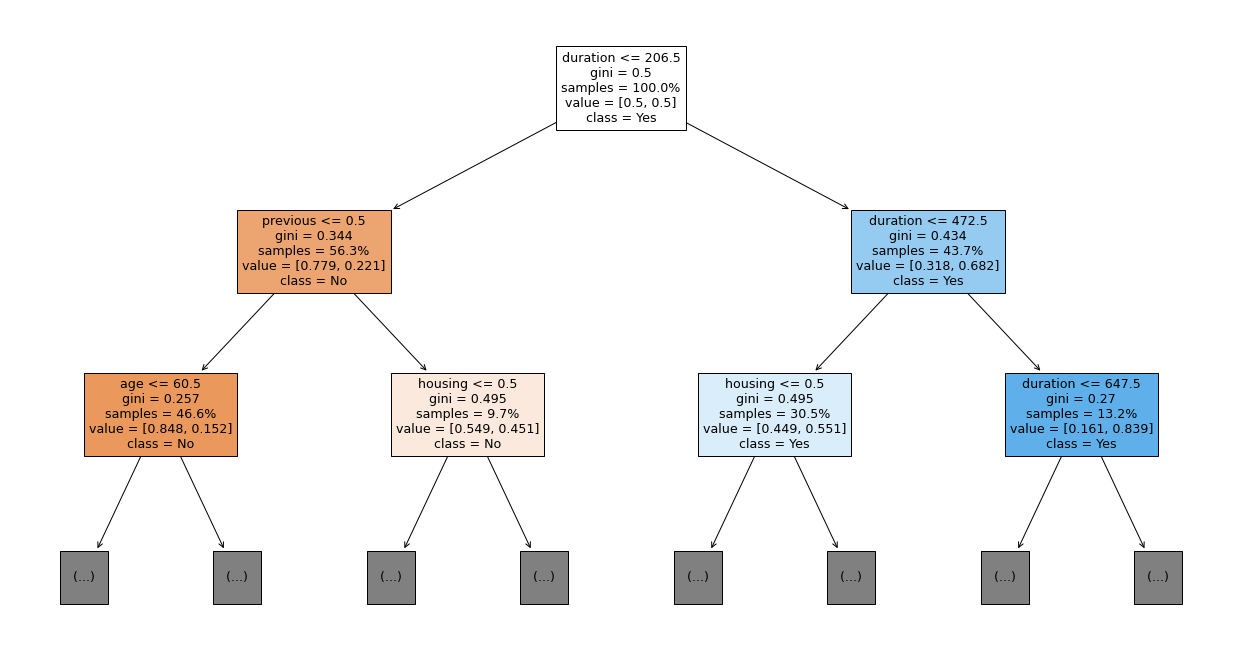

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt # This package is used to plot the tree. Here, it's used to decide the figure size.  

model = DecisionTreeClassifier(class_weight='balanced')
#model = DecisionTreeClassifier() # Fitting a decision tree model with default parameters
dt = GridSearchCV(model, param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]}) # a dictionary with the parameter name as the key, and the list contains the options, default is 5 fold, but you can change it with additin parameters. 

dt = dt.fit(X_train, y_train) # you can also delete 'dt = '. dt.fit() modifies dt and also returns dt. 

plt.subplots(figsize=(22, 12)) # width & height, define the overall dimension of the figure
plot_tree(dt.best_estimator_, max_depth=2, feature_names=X_train.columns, class_names=['No','Yes'],filled=True, proportion=True) # CV built 5 trees (estimators), best_estimator_ is the one with best accuracy.
plt.show()

In [10]:
y_pred_dt = dt.predict(X_test)

print("Decision tree accuracy for test set:", dt.score(X_test, y_test)) #score() is a method for DecisionTreeClassifier, it returns the mean accuracy on the given test data and labels.

print("\nClassification report:")
print(classification_report(y_test, y_pred_dt))

#print(dt.best_estimator_.feature_importances_)

#print(X_train.columns) # print the column names for reference. 

Decision tree accuracy for test set: 0.7832337978323379

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      7984
           1       0.33      0.81      0.47      1058

    accuracy                           0.78      9042
   macro avg       0.65      0.79      0.67      9042
weighted avg       0.89      0.78      0.82      9042



In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
#model = LogisticRegression()
logreg = GridSearchCV(model,param_grid={"penalty": ['l1','l2']})

logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

print("Logistic regression accuracy for test set:", logreg.score(X_test, y_test))
print("\nClassification report:")
print(classification_report(y_test, y_pred_log))
#print(logreg.best_estimator_.coef_)
#print(logreg.best_estimator_.intercept_)
#print(X_train.columns)

Logistic regression accuracy for test set: 0.7970581729705817

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      7984
           1       0.34      0.76      0.47      1058

    accuracy                           0.80      9042
   macro avg       0.65      0.78      0.67      9042
weighted avg       0.89      0.80      0.83      9042



In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced_subsample')
#model = RandomForestClassifier()
rf = GridSearchCV(model,param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]})
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random forest accuracy for test set:", rf.score(X_test, y_test))
print("\nClassification report:")
print(classification_report(y_test, y_pred_rf))

Random forest accuracy for test set: 0.8272506082725061

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7984
           1       0.39      0.81      0.52      1058

    accuracy                           0.83      9042
   macro avg       0.68      0.82      0.71      9042
weighted avg       0.90      0.83      0.85      9042

